In [1]:
# pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as smd

import sklearn
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
churn_data=pd.read_csv(r'churn_data.csv')
customer_data=pd.read_csv(r'customer_data.csv')
internet_data=pd.read_csv(r'internet_data.csv')

In [3]:
churn=pd.DataFrame(churn_data)
customer=pd.DataFrame(customer_data)
internet=pd.DataFrame(internet_data)

In [4]:
churn


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [5]:
churn.isnull().sum()
internet.isnull().sum()
customer.isnull().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [6]:
merging_customer_internet=pd.merge(customer,internet)

In [7]:
dataset=pd.merge(churn,merging_customer_internet)

In [8]:
dataset.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
dtype: object

In [9]:
dataset

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,Female,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No


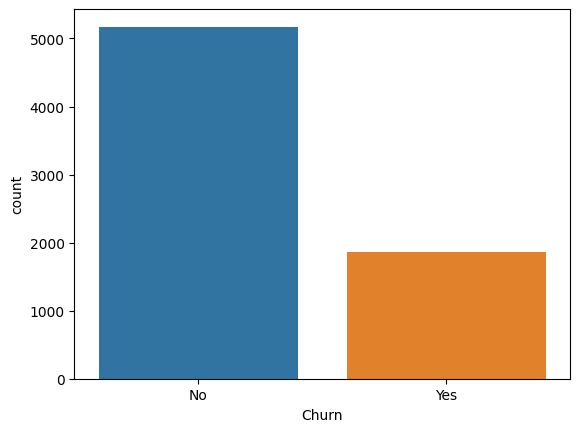

In [10]:
sns.countplot(x='Churn',data=dataset)
plt.show()

In [11]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype =='object']

In [12]:
len(categorical_features)

18

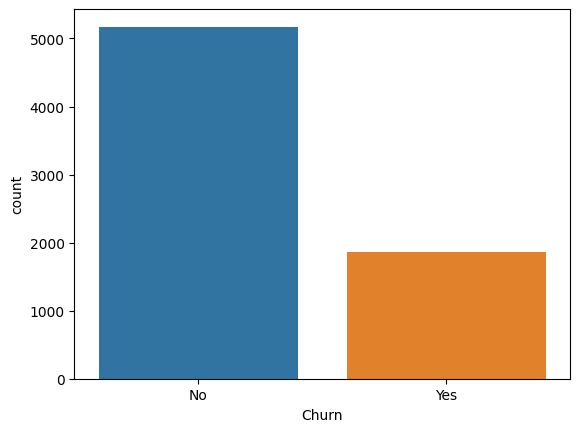

In [13]:
sns.countplot(x='Churn',data=dataset)
plt.show()

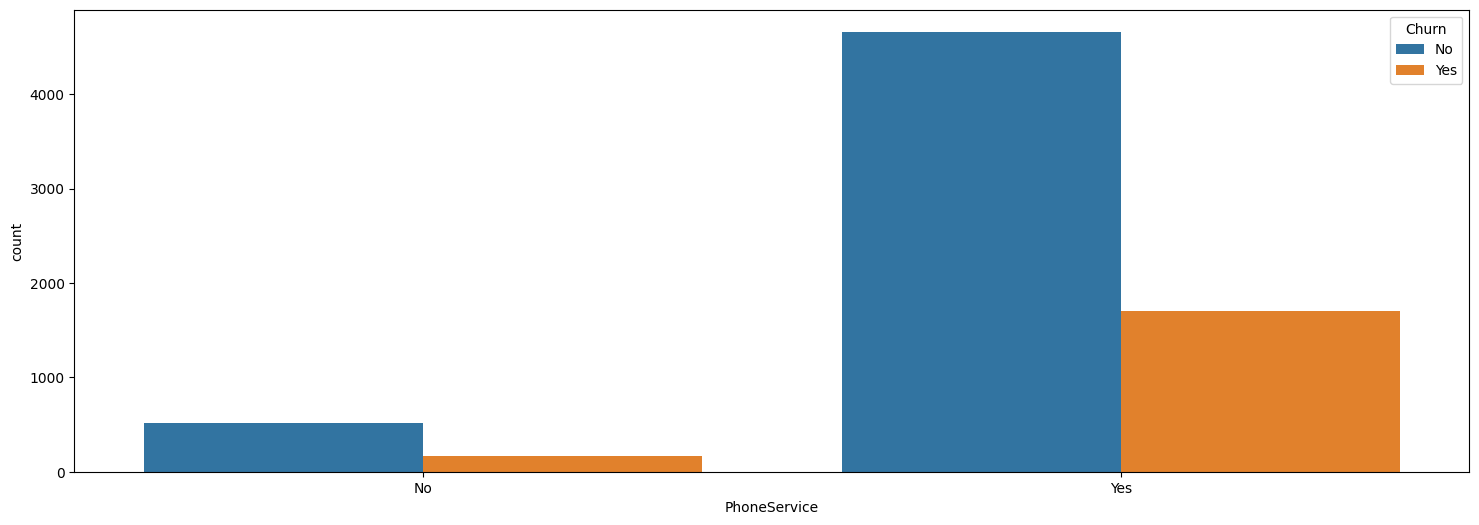

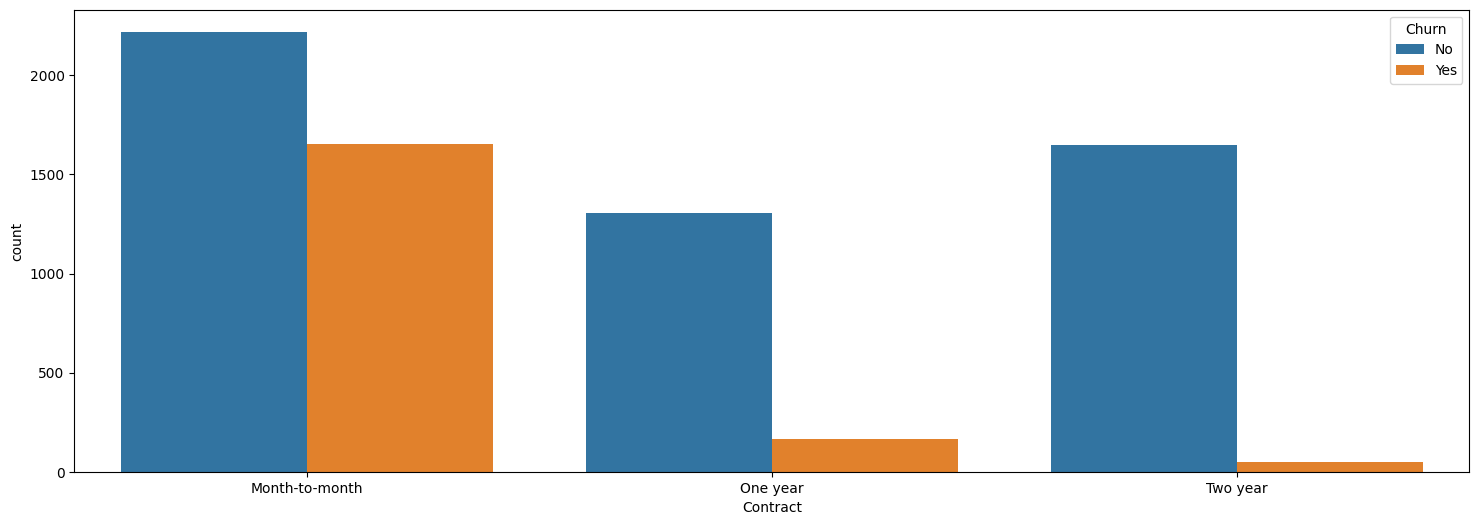

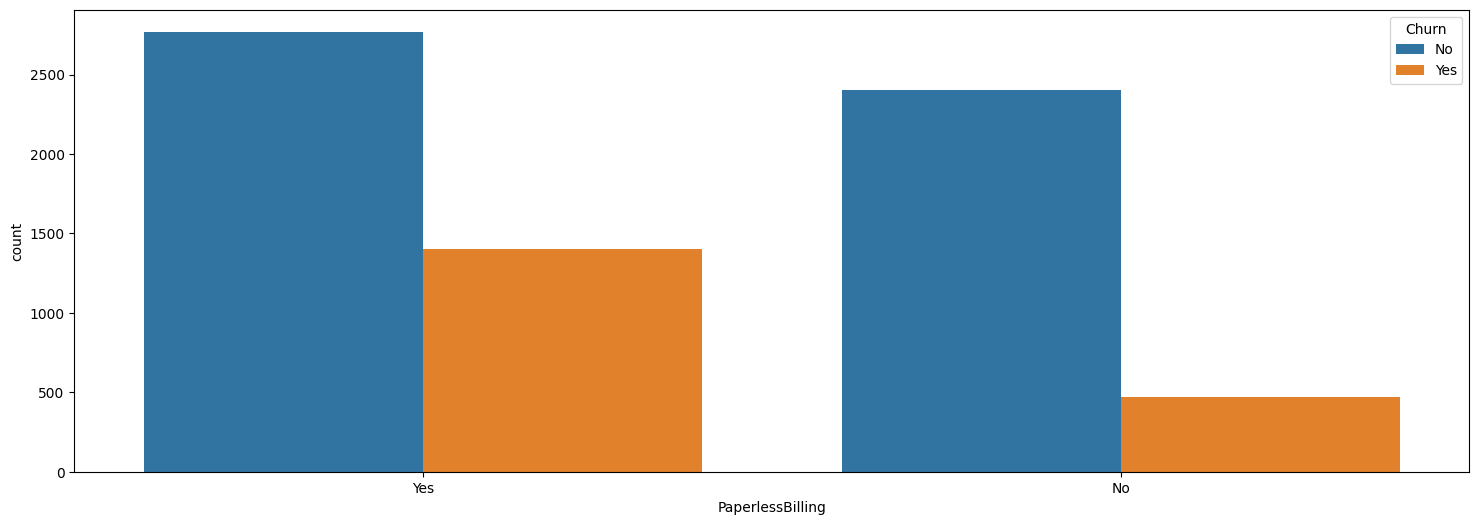

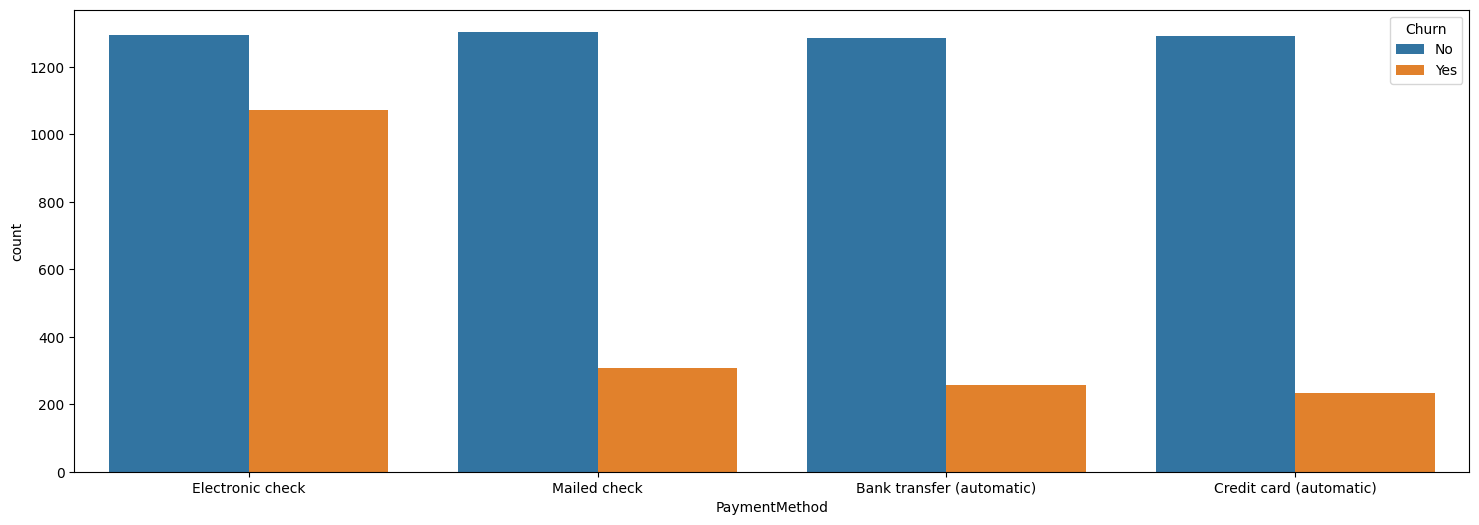

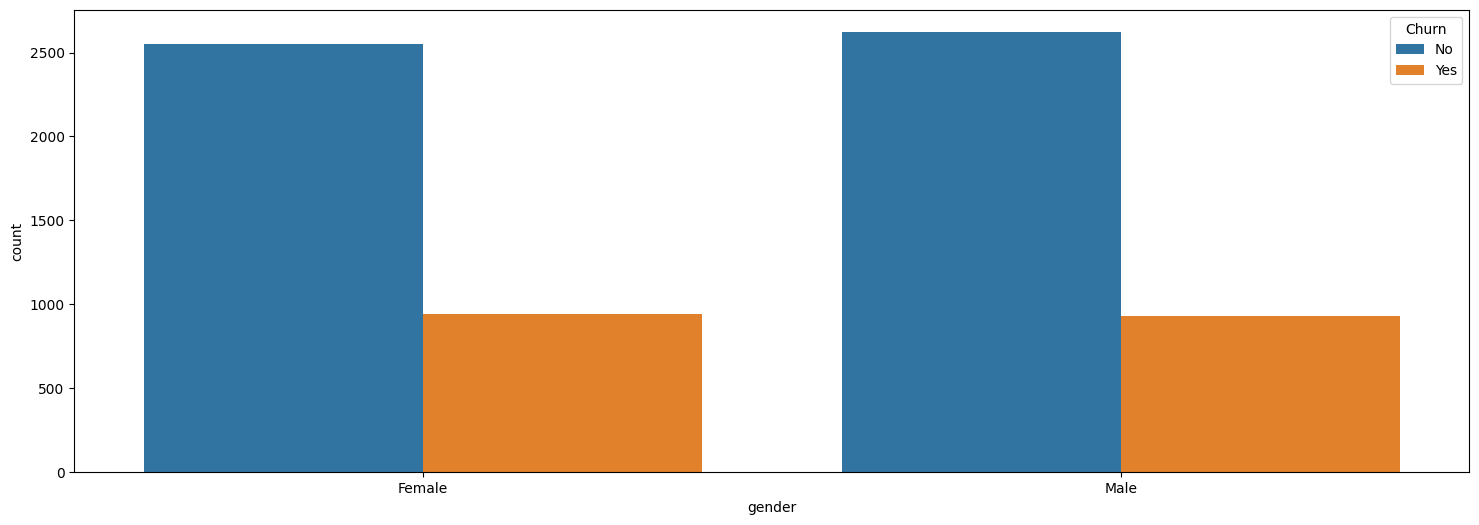

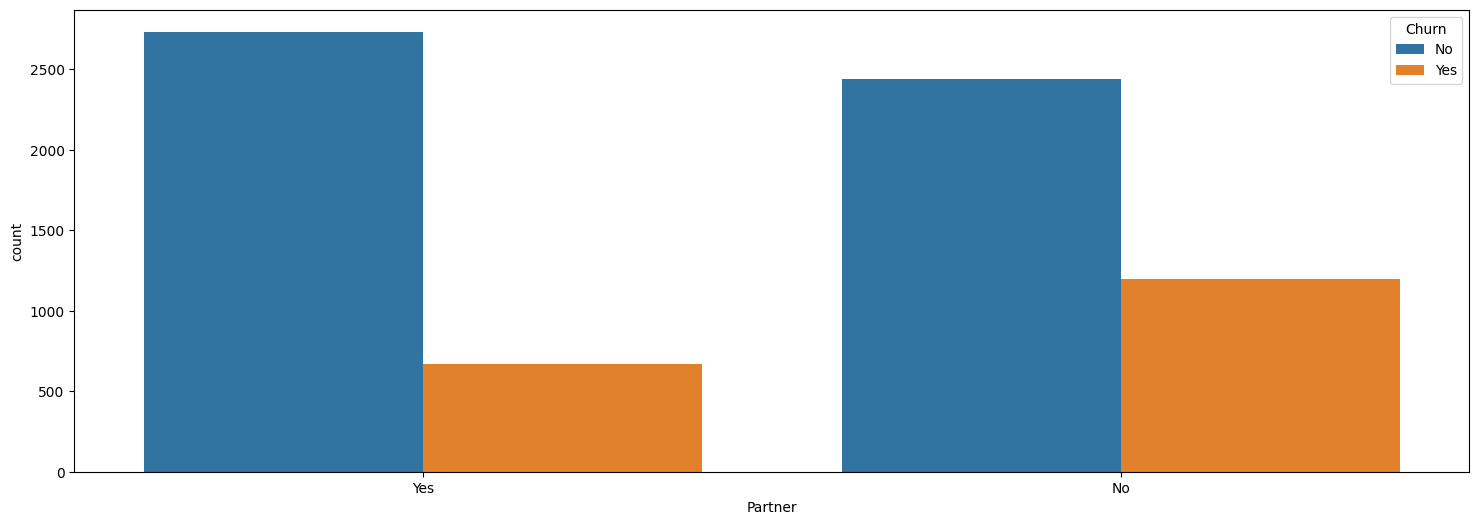

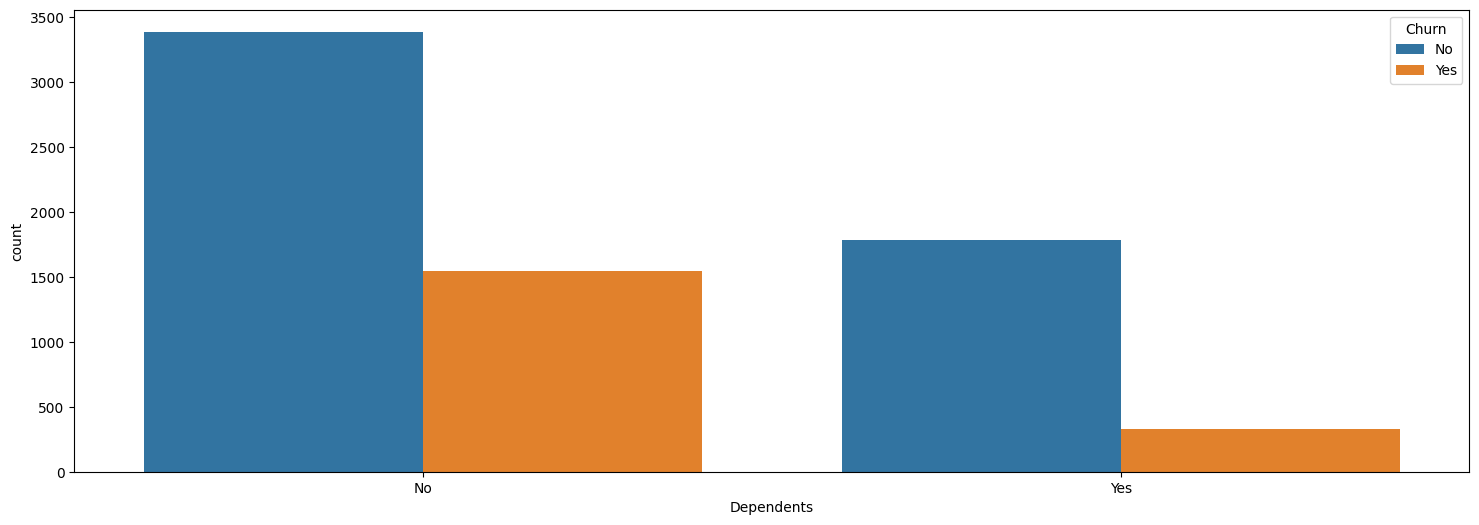

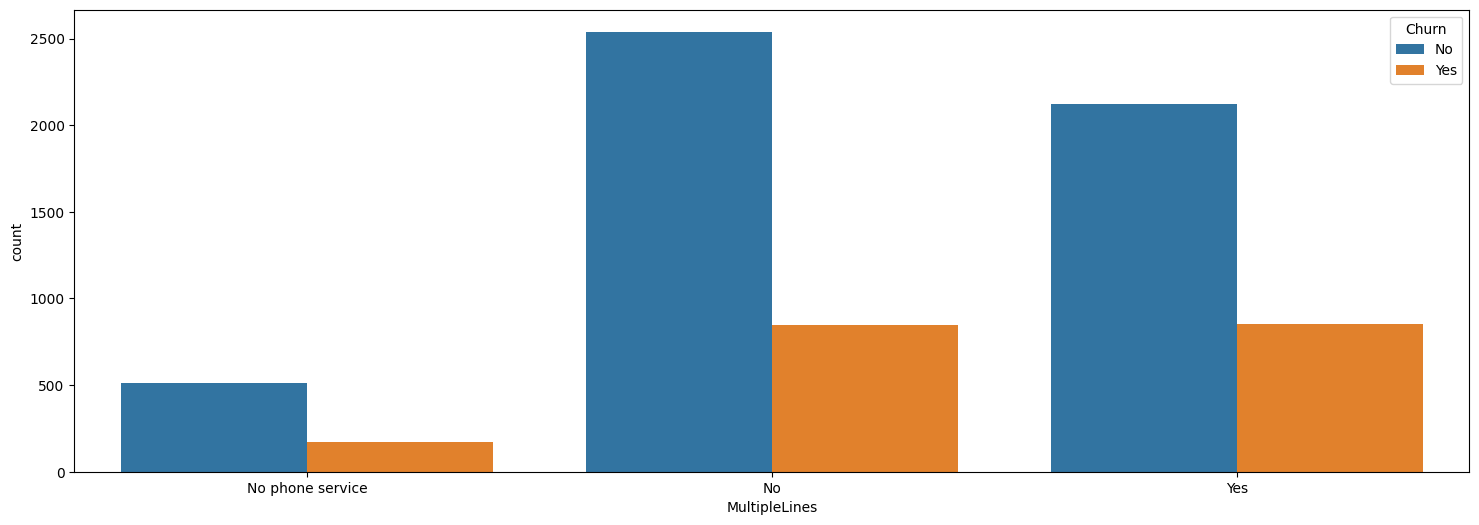

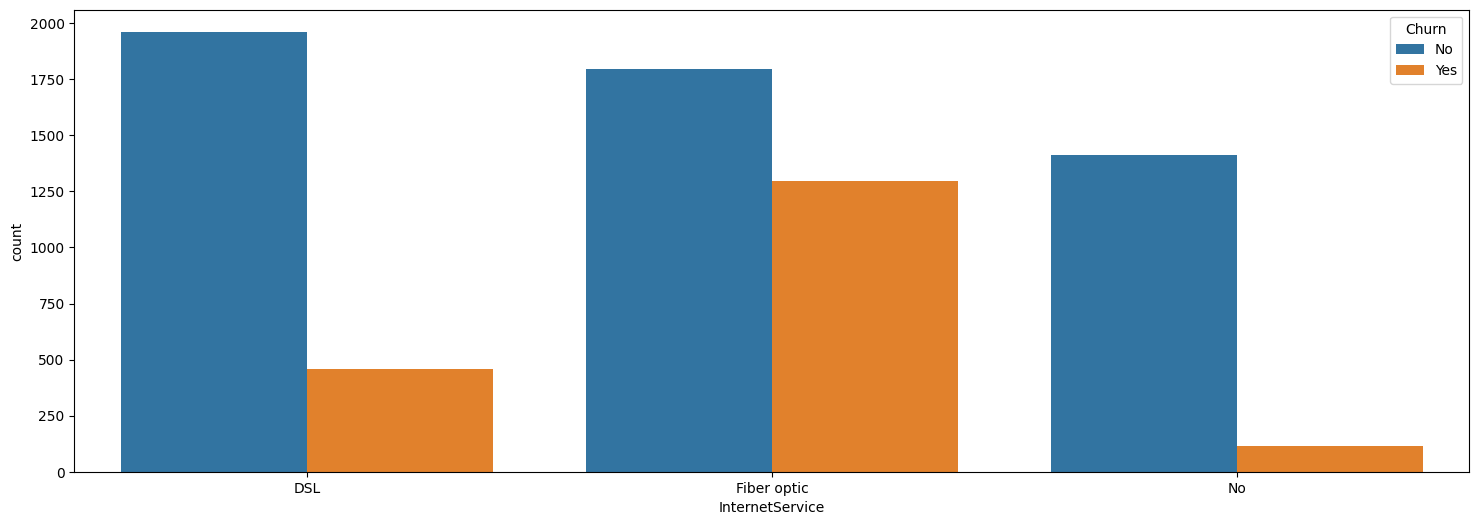

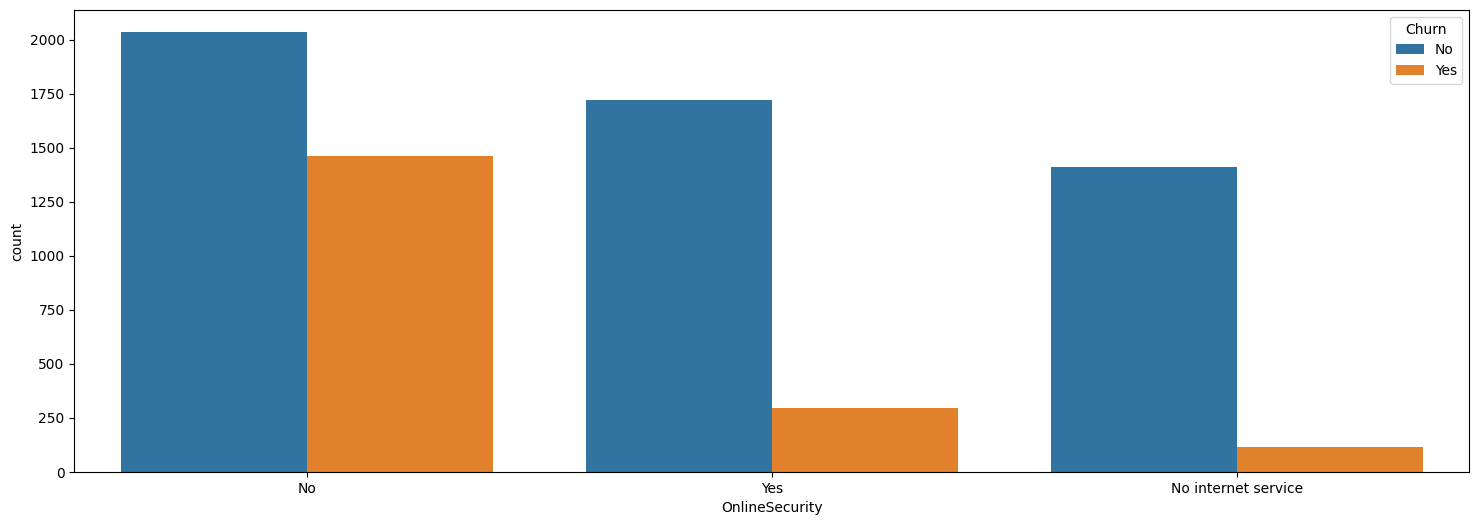

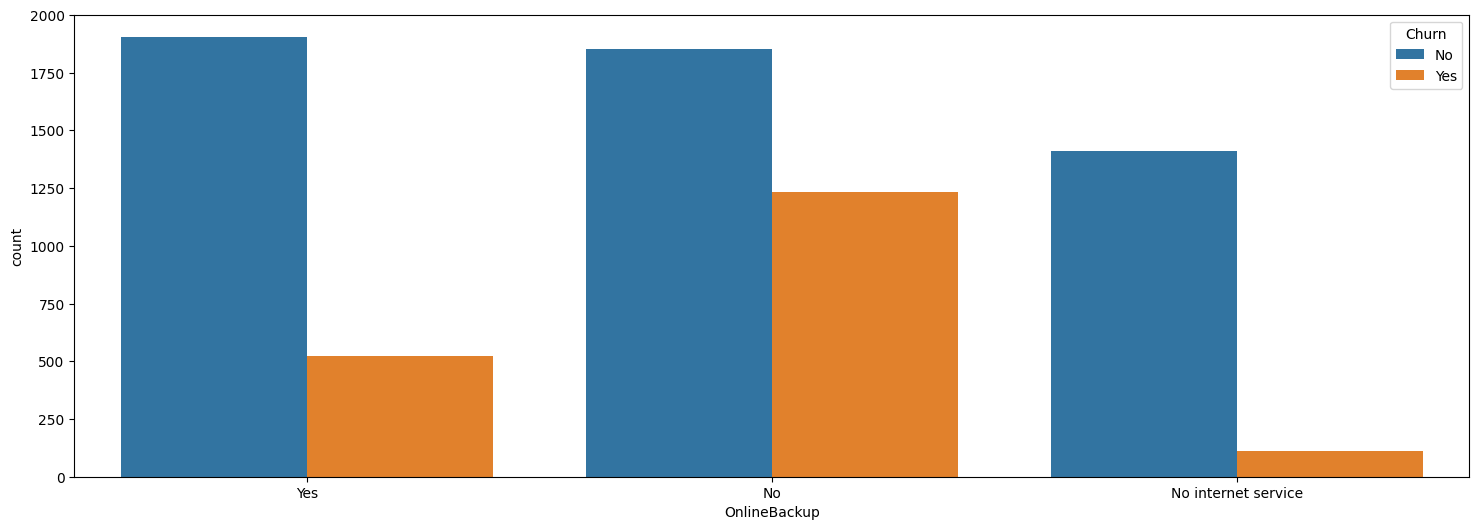

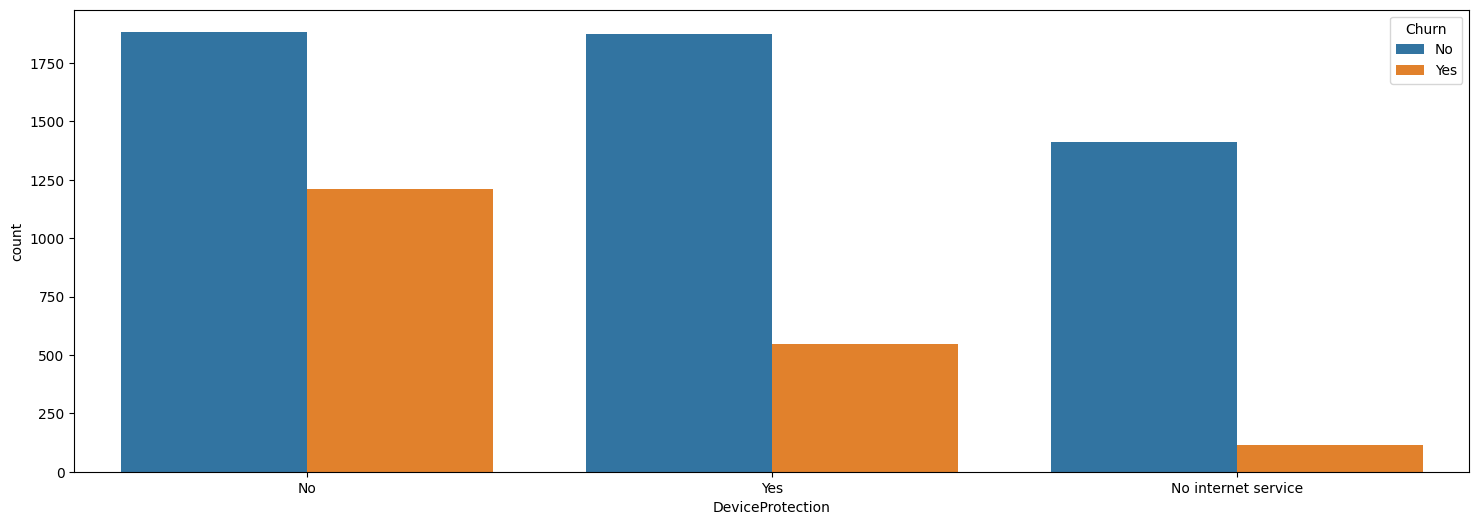

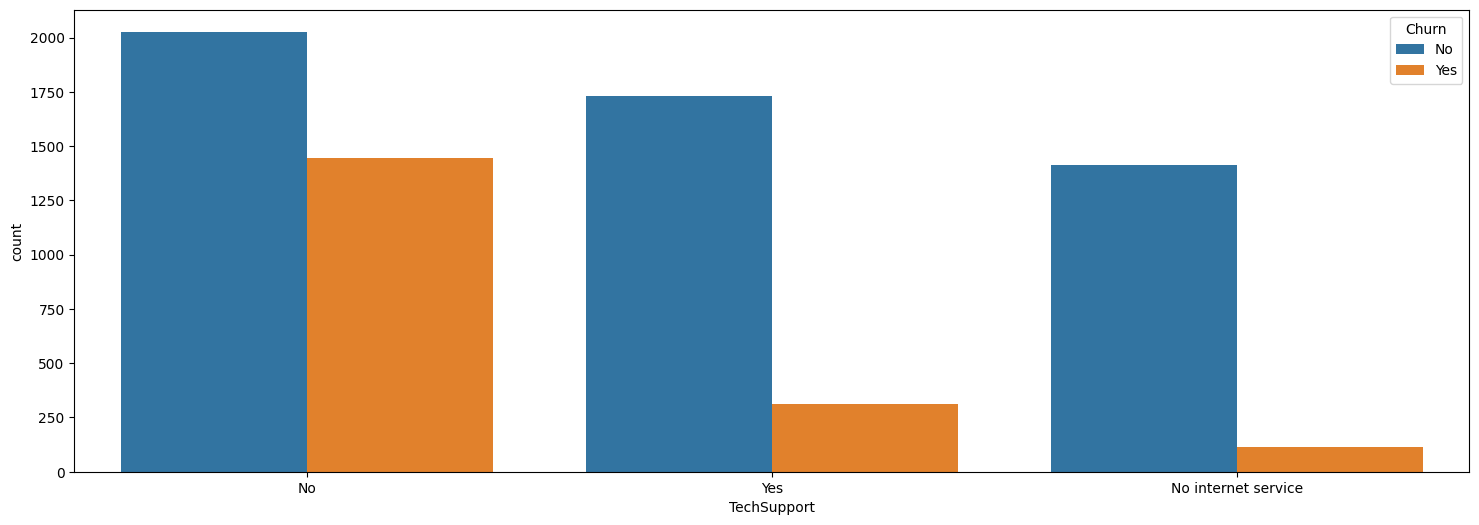

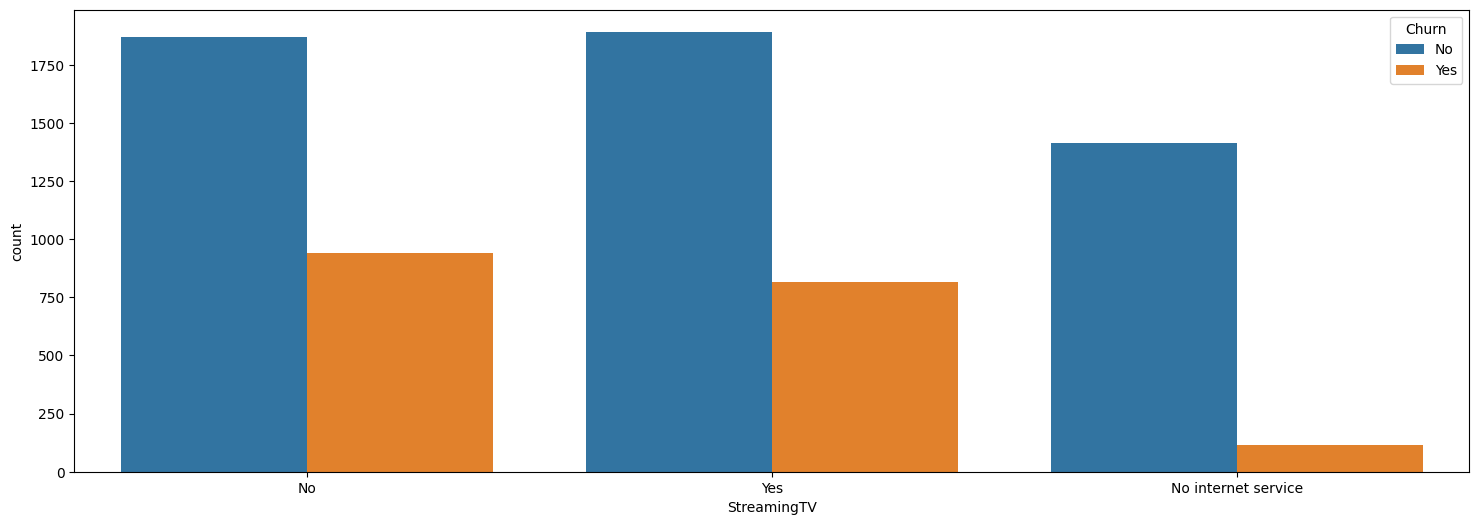

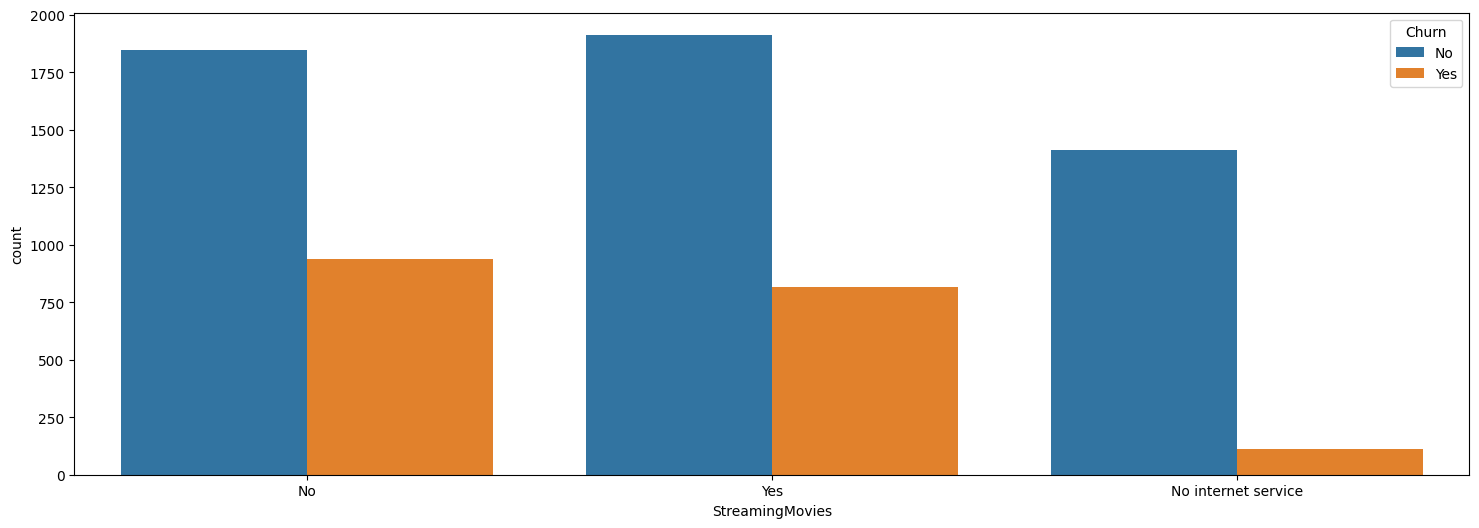

In [14]:

for feature in categorical_features:
    if feature not in ['customerID','TotalCharges','Churn']:
        plt.figure(figsize=(18,6))
        sns.countplot(x=feature, hue="Churn", data=dataset)
        

# CLEANING DATA 

In [15]:
clean_data=dataset.copy()
for feature in ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    clean_data[feature]=clean_data[feature].replace({'No internet service':'No'})

In [16]:
dataset

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,Female,...,No,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No


In [17]:
clean_data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,Female,...,No,No,No,No,No,No,No,No,No,No
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No


In [18]:
clean_data=clean_data.iloc[:,1:]

In [19]:
clean_data.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [20]:
clean_data['MultipleLines']=clean_data['MultipleLines'].replace({'No phone service':'No'})


In [21]:
clean_data.head()


,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No,DSL,Yes,No,Yes,Yes,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [22]:
ind=clean_data[clean_data['TotalCharges']==" "].index
clean_data=clean_data.drop(index=ind)
clean_data['TotalCharges']=clean_data['TotalCharges'].apply(lambda x: float(x) )


<Axes: xlabel='TotalCharges', ylabel='Density'>

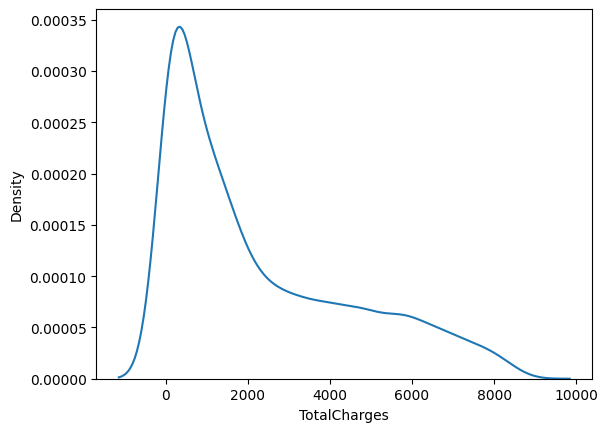

In [23]:
sns.kdeplot(clean_data['TotalCharges'])

In [24]:
numerical_features=['Churn','MonthlyCharges','TotalCharges']

# One Hot Encoder

In [25]:
oe=OneHotEncoder()

In [26]:
categorical_features.remove('customerID')
categorical_features.remove('TotalCharges')
categorical_features.remove('Churn')

In [27]:
encodered_data=pd.get_dummies(clean_data[categorical_features])

In [28]:
len(categorical_features)

15

In [29]:
numerical_features=['tenure','MonthlyCharges','TotalCharges','SeniorCitizen','Churn']

In [30]:
full_data=encodered_data.merge(clean_data[numerical_features],left_index=True, right_index=True)

In [31]:
full_data

,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn
0,1,0,1,0,0,0,1,0,0,1,...,0,1,0,1,0,1,29.85,29.85,0,No
1,0,1,0,1,0,1,0,0,0,0,...,0,1,0,1,0,34,56.95,1889.50,0,No
2,0,1,1,0,0,0,1,0,0,0,...,0,1,0,1,0,2,53.85,108.15,0,Yes
3,1,0,0,1,0,1,0,1,0,0,...,1,1,0,1,0,45,42.30,1840.75,0,No
4,0,1,1,0,0,0,1,0,0,1,...,0,1,0,1,0,2,70.70,151.65,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,1,0,0,1,0,1,1,0,0,...,0,1,0,1,0,72,21.15,1419.40,0,No
7038,0,1,0,1,0,0,1,0,0,0,...,1,0,1,0,1,24,84.80,1990.50,0,No
7039,0,1,0,1,0,0,1,0,1,0,...,0,0,1,0,1,72,103.20,7362.90,0,No
7040,1,0,1,0,0,0,1,0,0,1,...,0,1,0,1,0,11,29.60,346.45,0,No


In [32]:
 # Test HERE

In [33]:
numerical_features.remove('SeniorCitizen')

/tmp/ipykernel_1344/667819224.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(full_data[numerical_features].corr())


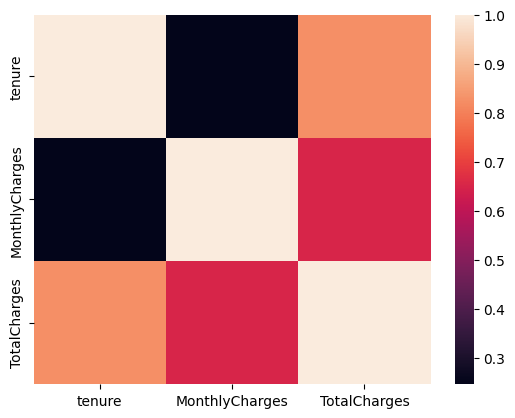

In [34]:
sns.heatmap(full_data[numerical_features].corr())
plt.show()

In [35]:
# Replacing Yes and No with 0 or 1
full_data['Churn']=np.where(full_data['Churn']=='No',0,1)

In [65]:
full_data.head()

,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn
0,1,0,1,0,0,0,1,0,0,1,...,0,1,0,1,0,1,29.85,29.85,0,0
1,0,1,0,1,0,1,0,0,0,0,...,0,1,0,1,0,34,56.95,1889.50,0,0
2,0,1,1,0,0,0,1,0,0,0,...,0,1,0,1,0,2,53.85,108.15,0,1
3,1,0,0,1,0,1,0,1,0,0,...,1,1,0,1,0,45,42.30,1840.75,0,0
4,0,1,1,0,0,0,1,0,0,1,...,0,1,0,1,0,2,70.70,151.65,0,1


In [67]:
full_data.iloc[2]

PhoneService_No                              0.00
PhoneService_Yes                             1.00
Contract_Month-to-month                      1.00
Contract_One year                            0.00
Contract_Two year                            0.00
PaperlessBilling_No                          0.00
PaperlessBilling_Yes                         1.00
PaymentMethod_Bank transfer (automatic)      0.00
PaymentMethod_Credit card (automatic)        0.00
PaymentMethod_Electronic check               0.00
PaymentMethod_Mailed check                   1.00
gender_Female                                0.00
gender_Male                                  1.00
Partner_No                                   1.00
Partner_Yes                                  0.00
Dependents_No                                1.00
Dependents_Yes                               0.00
MultipleLines_No                             1.00
MultipleLines_Yes                            0.00
InternetService_DSL                          1.00


In [37]:
# Remove Churn from Full Data set
X=full_data.iloc[:,:-1]

In [38]:
X

,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,1,0,1,0,0,0,1,0,0,1,...,1,0,1,0,1,0,1,29.85,29.85,0
1,0,1,0,1,0,1,0,0,0,0,...,1,0,1,0,1,0,34,56.95,1889.50,0
2,0,1,1,0,0,0,1,0,0,0,...,1,0,1,0,1,0,2,53.85,108.15,0
3,1,0,0,1,0,1,0,1,0,0,...,0,1,1,0,1,0,45,42.30,1840.75,0
4,0,1,1,0,0,0,1,0,0,1,...,1,0,1,0,1,0,2,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,1,0,0,1,0,1,1,0,0,...,1,0,1,0,1,0,72,21.15,1419.40,0
7038,0,1,0,1,0,0,1,0,0,0,...,0,1,0,1,0,1,24,84.80,1990.50,0
7039,0,1,0,1,0,0,1,0,1,0,...,1,0,0,1,0,1,72,103.20,7362.90,0
7040,1,0,1,0,0,0,1,0,0,1,...,1,0,1,0,1,0,11,29.60,346.45,0


In [39]:
Y=full_data['Churn']

In [40]:
ss=StandardScaler()

In [41]:
col=[colu for colu in clean_data.columns if colu not in numerical_features]

In [42]:
col

['PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [43]:
from sklearn.preprocessing import Normalizer


In [44]:
Norm=Normalizer()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=7)

In [45]:
X_train.head()


,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
3577,0,1,0,1,0,0,1,0,0,0,...,0,1,1,0,0,1,36,65.40,2498.40,0
3270,0,1,1,0,0,0,1,0,0,0,...,0,1,0,1,0,1,4,100.85,399.25,0
5212,1,0,0,0,1,1,0,0,1,0,...,1,0,1,0,1,0,72,38.50,2763.00,0
4329,0,1,1,0,0,1,0,0,0,1,...,1,0,0,1,1,0,17,94.40,1607.20,0
4417,0,1,1,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,70.45,70.45,0


from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)


from sklearn.metrics import classification_report, confusion_matrix
y_pred = svclassifier.predict(X_test)

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


Y_test.value_counts()


 # XG BOOST

In [46]:
estimate=clean_data['Churn'].value_counts()['No']/clean_data['Churn'].value_counts()['Yes']

In [47]:
from numpy import mean
from xgboost import XGBClassifier
model = XGBClassifier(scale_pos_weight=estimate)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.81581


In [48]:
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[1244  299]
 [ 183  384]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1543
           1       0.56      0.68      0.61       567

    accuracy                           0.77      2110
   macro avg       0.72      0.74      0.73      2110
weighted avg       0.79      0.77      0.78      2110



In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.771563981042654

In [51]:
from imblearn.combine import SMOTETomek 


In [52]:
smk = SMOTETomek(sampling_strategy=0.8)

In [53]:
X_res_ety,Y_res_ety=smk.fit_resample(X,Y)

In [54]:
Y_res_ety.value_counts()

0    4737
1    3704
Name: Churn, dtype: int64

In [55]:
X_train_ety,X_test_ety,Y_train_ety,Y_test_ety=train_test_split(X_res_ety,Y_res_ety,test_size=0.3,random_state=7)

In [56]:
from numpy import mean
from xgboost import XGBClassifier
model = XGBClassifier()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train_ety, Y_train_ety, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.93479


In [57]:
model.fit(X_train_ety,Y_train_ety)
Y_pred_ety = model.predict(X_test_ety)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test_ety,Y_pred_ety))
print(classification_report(Y_test_ety,Y_pred_ety))

[[1269  145]
 [ 186  933]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1414
           1       0.87      0.83      0.85      1119

    accuracy                           0.87      2533
   macro avg       0.87      0.87      0.87      2533
weighted avg       0.87      0.87      0.87      2533



In [59]:
accuracy_score(Y_test_ety,Y_pred_ety)

0.8693249111725228

In [60]:
Y_test_ety


2600    0
3734    1
4556    0
2307    0
1968    1
       ..
5866    1
6465    1
3745    0
336     1
4235    0
Name: Churn, Length: 2533, dtype: int64

In [61]:
X_test_ety

,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
2600,0,1,1,0,0,0,1,0,0,0,...,0,1,1,0,1,0,6,48.800000,297.350000,0
3734,0,1,1,0,0,1,0,0,0,1,...,0,1,0,1,0,1,29,98.650000,2862.750000,1
4556,1,0,0,1,0,0,1,0,1,0,...,1,0,0,1,0,1,22,49.450000,1031.400000,0
2307,0,1,1,0,0,1,0,0,0,1,...,0,1,1,0,1,0,8,49.400000,408.250000,0
1968,0,1,1,0,0,0,1,0,0,1,...,1,0,0,1,0,1,1,100.800000,100.800000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5866,0,1,1,0,0,0,1,0,0,1,...,1,0,1,0,0,1,2,85.850000,167.300000,0
6465,0,1,1,0,0,0,0,0,0,1,...,1,0,1,0,1,0,16,45.906236,769.928184,0
3745,0,1,0,0,1,0,1,0,1,0,...,1,0,1,0,1,0,71,25.950000,1801.900000,0
336,0,1,1,0,0,0,1,0,1,0,...,1,0,1,0,0,1,1,90.850000,90.850000,0


In [62]:
model.save_model('xgb_model.json')

In [63]:
X_train.dtypes

PhoneService_No                              uint8
PhoneService_Yes                             uint8
Contract_Month-to-month                      uint8
Contract_One year                            uint8
Contract_Two year                            uint8
PaperlessBilling_No                          uint8
PaperlessBilling_Yes                         uint8
PaymentMethod_Bank transfer (automatic)      uint8
PaymentMethod_Credit card (automatic)        uint8
PaymentMethod_Electronic check               uint8
PaymentMethod_Mailed check                   uint8
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
MultipleLines_No                             uint8
MultipleLines_Yes                            uint8
InternetService_DSL            

In [64]:
X_train.head()


,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
3577,0,1,0,1,0,0,1,0,0,0,...,0,1,1,0,0,1,36,65.40,2498.40,0
3270,0,1,1,0,0,0,1,0,0,0,...,0,1,0,1,0,1,4,100.85,399.25,0
5212,1,0,0,0,1,1,0,0,1,0,...,1,0,1,0,1,0,72,38.50,2763.00,0
4329,0,1,1,0,0,1,0,0,0,1,...,1,0,0,1,1,0,17,94.40,1607.20,0
4417,0,1,1,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,70.45,70.45,0


PhoneService_No                              uint8
PhoneService_Yes                             uint8

Contract_Month-to-month                      uint8
Contract_One year                            uint8
Contract_Two year                            uint8

PaperlessBilling_No                          uint8
PaperlessBilling_Yes                         uint8

PaymentMethod_Bank transfer (automatic)      uint8
PaymentMethod_Credit card (automatic)        uint8
PaymentMethod_Electronic check               uint8
PaymentMethod_Mailed check                   uint8

gender_Female                                uint8
gender_Male                                  uint8

Partner_No                                   uint8
Partner_Yes                                  uint8

Dependents_No                                uint8
Dependents_Yes                               uint8

MultipleLines_No                             uint8
MultipleLines_Yes                            uint8

InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8

OnlineSecurity_No                            uint8
OnlineSecurity_Yes                           uint8

OnlineBackup_No                              uint8
OnlineBackup_Yes                             uint8

DeviceProtection_No                          uint8
DeviceProtection_Yes                         uint8

TechSupport_No                               uint8
TechSupport_Yes                              uint8

StreamingTV_No                               uint8
StreamingTV_Yes                              uint8

StreamingMovies_No                           uint8
StreamingMovies_Yes                          uint8

tenure                                       int64

MonthlyCharges                             float64

TotalCharges                               float64

SeniorCitizen                                int64